<a href="https://colab.research.google.com/github/k9alex2005/projects/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('hr_data.csv')
data.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


EDA to figure out variables that could have a clear impact on employee retention

In [13]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
data['left'].value_counts()

,count
left,
0,11428
1,3571


/tmp/ipython-input-101-2166849231.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot(
/tmp/ipython-input-101-2166849231.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(
/tmp/ipython-input-101-2166849231.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(
/tmp/ipython-input-101-2166849231.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(
/tmp/ipython-input-101-2166849231.py:41: MatplotlibDeprecationWarning: Th

Text(0, 0.5, 'time spent in the company')

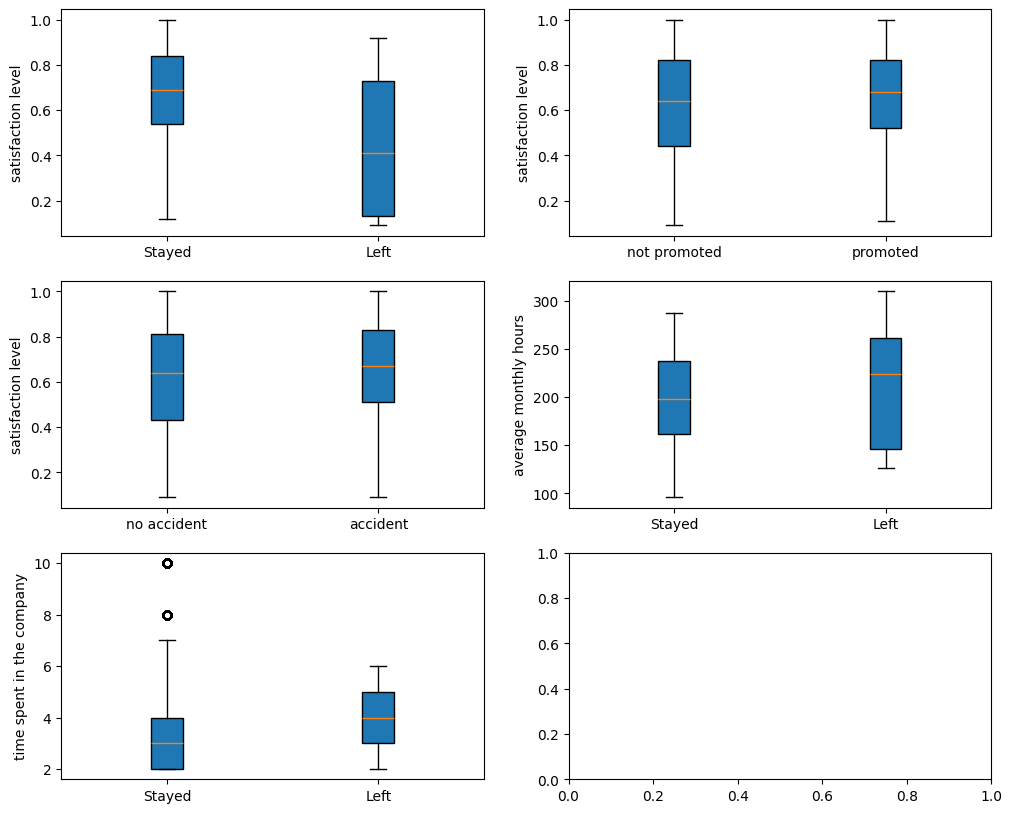

In [101]:
# Set up a 2x2 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Plot 1: Satisfactory Level by left or stayed
axes[0, 0].boxplot(
    [data[data['left'] == 0]['satisfaction_level'], data[data['left'] == 1]['satisfaction_level']],
    labels=['Stayed', 'Left'],
    patch_artist=True
)
axes[0, 0].set_ylabel('satisfaction level')


# Plot 2: Satisfactory Level grouped by promotion status
axes[0, 1].boxplot(
    [data[data['promotion_last_5years'] == 0]['satisfaction_level'], data[data['promotion_last_5years'] == 1]['satisfaction_level']],
    labels=['not promoted', 'promoted'],
    patch_artist=True
)
axes[0, 1].set_ylabel('satisfaction level')

#Plot 3: Satisfactory Level grouped by work accident
axes[1, 0].boxplot(
    [data[data['Work_accident'] == 0]['satisfaction_level'], data[data['Work_accident'] == 1]['satisfaction_level']],
    labels=['no accident', 'accident'],
    patch_artist=True
)
axes[1, 0].set_ylabel('satisfaction level')





axes[1, 1].boxplot(
    [data[data['left'] == 0]['average_montly_hours'], data[data['left'] == 1]['average_montly_hours']],
    labels=['Stayed', 'Left'],
    patch_artist=True
)
axes[1, 1].set_ylabel('average monthly hours')


axes[2, 0].boxplot(
    [data[data['left'] == 0]['time_spend_company'], data[data['left'] == 1]['time_spend_company']],
    labels=['Stayed', 'Left'],
    patch_artist=True
)
axes[2, 0].set_ylabel('time spent in the company')




the group of people who have left generally cover a wider range of satisfaction levels, having a smaller satisfaction level as compared to those who have stayed where this group of people would have a smaller range of satisfaction levels concentrated on the upper region.

The satisfaction levels across promotion status shows similar distributions with those being promoted having a slightly higher minimum satisfaction.

Also the avg monthly hours encovers a wider range for those who have left the company and a higher median, as compared to those who stayed.

<Axes: >

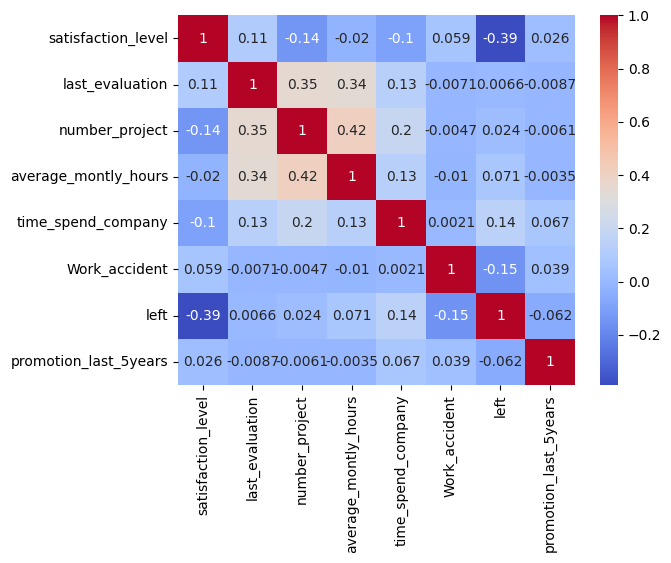

In [41]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


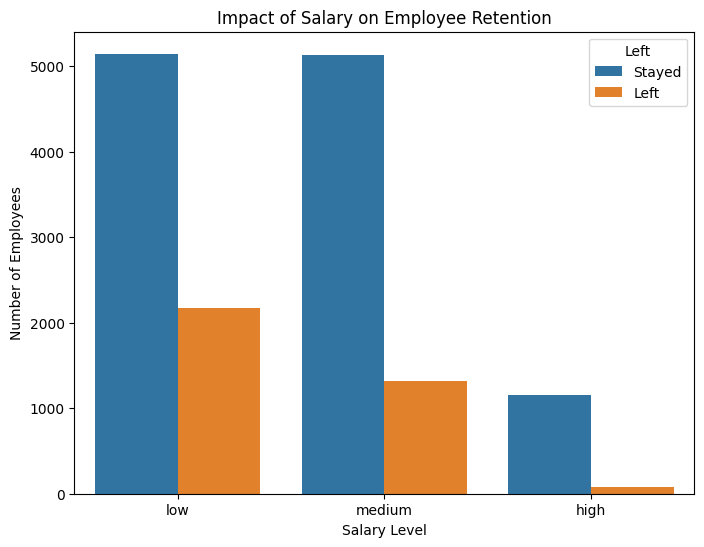

In [46]:

# Countplot of salary vs retention
plt.figure(figsize=(8, 6))
sns.countplot(data, x='salary', hue='left', order=['low', 'medium', 'high'])
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])  # 0 = Stayed, 1 = Left
plt.show()



Number of employees with medium and low pay who have stayed are almost equal although more people have left in the case of low salaries. Comparitively only a fraction of the total amount of employees recieve high pay and accordinly very few among them have left the company.

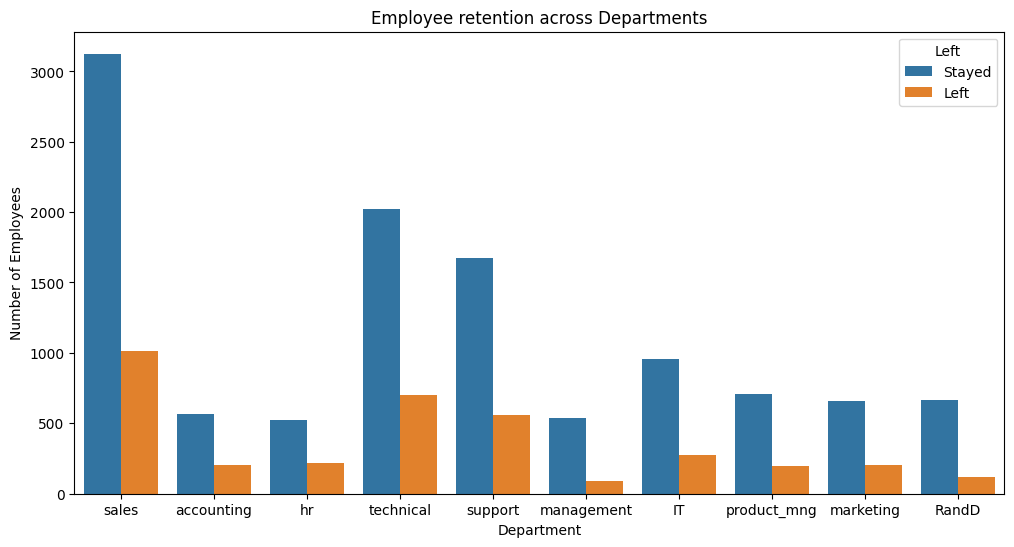

In [52]:
#comparing retention across the different departments
# Countplot of department vs retention
plt.figure(figsize=(12, 6))
sns.countplot(data, x='Department', hue='left')
plt.title('Employee retention across Departments')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])  # 0 = Stayed, 1 = Left
plt.show()



sales contains most employees that have stayed followed by the technical and support departments. These departments also have the most people who have left in the same order as mentioned.

In [98]:
#satisfaction level, average monthly hours, salary, possible department?
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#numeric columns
X = data[['satisfaction_level', 'average_montly_hours', 'time_spend_company']]
y = data['left']

for feature in X.columns:
    #spliting into test and train

    print("Feature: ",feature)
    X_train ,X_test, y_train ,y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42)

    model = LogisticRegression(class_weight='balanced', max_iter=1000)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))






Feature:  satisfaction_level
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2294
           1       0.44      0.71      0.54       706

    accuracy                           0.72      3000
   macro avg       0.66      0.72      0.67      3000
weighted avg       0.78      0.72      0.74      3000

Feature:  average_montly_hours
              precision    recall  f1-score   support

           0       0.78      0.53      0.63      2294
           1       0.25      0.51      0.34       706

    accuracy                           0.53      3000
   macro avg       0.52      0.52      0.48      3000
weighted avg       0.66      0.53      0.56      3000

Feature:  time_spend_company
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      2294
           1       0.35      0.53      0.43       706

    accuracy                           0.66      3000
   macro avg       0.59      0.62      

In [91]:
#encoding categorical columns
from sklearn.preprocessing import LabelEncoder

cat_data = data.select_dtypes(include='object')

#one hot encoding of department
encoded = pd.get_dummies(data, columns = ['Department'], drop_first=True )
encoded['salary'] = LabelEncoder().fit_transform(encoded['salary'])

encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,True,False,False


In [136]:
#now including the relevant features with the encoded columns

X = encoded.drop(labels = ['left'], axis = 1)
y = data['left']

for feature in X.columns:
    #spliting into test and train

    print("Feature: ",feature)
    X_train ,X_test, y_train ,y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42)

    model = LogisticRegression(class_weight='balanced', max_iter=1000)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))



Feature:  satisfaction_level
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2294
           1       0.44      0.71      0.54       706

    accuracy                           0.72      3000
   macro avg       0.66      0.72      0.67      3000
weighted avg       0.78      0.72      0.74      3000

Feature:  last_evaluation
              precision    recall  f1-score   support

           0       0.77      0.50      0.60      2294
           1       0.24      0.51      0.32       706

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.46      3000
weighted avg       0.64      0.50      0.54      3000

Feature:  number_project
              precision    recall  f1-score   support

           0       0.74      0.42      0.54      2294
           1       0.22      0.52      0.31       706

    accuracy                           0.45      3000
   macro avg       0.48      0.47      0.42     

the best feature overall appears to be satisfaction levels and time spent in the company.

In [142]:
#multi logistic regression using salary, time spend in company and satisfaction levels
#now including the relevant features with the encoded columns

X = encoded.drop(labels = ['left', 'salary'], axis = 1)
y = data['left']

X_train ,X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2294
           1       0.48      0.78      0.60       706

    accuracy                           0.75      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.75      0.77      3000

                   Feature  Coefficient
1          last_evaluation     1.202074
4       time_spend_company     0.451080
9            Department_hr     0.372841
15    Department_technical     0.252288
14      Department_support     0.213377
11    Department_marketing     0.199990
13        Department_sales     0.176497
8    Department_accounting     0.122258
12  Department_product_mng     0.116234
3     average_montly_hours     0.005309
2           number_project    -0.407338
7         Department_RandD    -0.501762
10   Department_management    -0.714915
5            Work_accident    -1.476233
6    promotion_last_5years    -1.620156
0       satisfaction_level    -4.

The model appears to be performing better when including all the relevant features. Overall accuracy: 0.75


Based on the coefficients satisfaction levels seem impact retention rate as expected, with higher satisfaction leading to more retention. Work accidents and also promotions seem to show small negative coefficients which again could be attributed to the extra benefits from work accidents and higher incentive for promoted employess to stay.


Also the slightly positive coefficient for last_evaluation may indicate that as the evualtion scores increase they have a slightly higher chance of leaving the company maybe due to overworking, stress and not being rewarded properly.

In [143]:
#testing for overfitting


print("Train:")
print(classification_report(y_train, model.predict(X_train)))
print("Test:")
print(classification_report(y_test, model.predict(X_test)))


Train:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      9134
           1       0.49      0.78      0.60      2865

    accuracy                           0.75     11999
   macro avg       0.70      0.76      0.71     11999
weighted avg       0.81      0.75      0.77     11999

Test:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2294
           1       0.48      0.78      0.60       706

    accuracy                           0.75      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.75      0.77      3000



The models' performance on training and testing set does not indicate any major differences and hence overfitting may not be a possibility.

In [144]:
#employing cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("Cross-validated F1 scores:", scores)
print("Mean F1 score:", scores.mean())


Cross-validated F1 scores: [0.6083151  0.59866221 0.60575858 0.61061947 0.54991243]
Mean F1 score: 0.5946535583362385


Based on our results, we can see that the most highly predictive factor in deciding whether an employee would leave or not is their satisfaction level.